In [80]:
from spectral import *
import matplotlib.pyplot as plt

# paths of the binary and hdr data files of the spectral information
img_bin = "/home/sayan/ce301/read_file/day1/mango_day_1_m3_01_front.bin"
img_hdr = "/home/sayan/ce301/read_file/day1/mango_day_1_m3_01_front.hdr"

# spy reading images using envi which the spectral data is associated with.
img1 = envi.open(img_hdr, img_bin)

# Prints out the information of the image
print(img1)

	Data Source:   '/home/sayan/ce301/read_file/day1/mango_day_1_m3_01_front.bin'
	# Rows:             64
	# Samples:          64
	# Bands:           224
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32


In [81]:
# prints (image row, columns, bands)
print("(row, columns, bands)", img1.shape)
# getting data of a certain pixel in the image 
pixel = img1[20,20] #img pixel at 20th row 20th column.

(row, columns, bands) (64, 64, 224)


In [82]:
# loding an entire image to avoid significant run time penalty.
load_img = img1.load()
# the load method returns the imgage array object.
print(load_img.__class__,"\n")

# returns the image information
print(load_img.info())

<class 'spectral.image.ImageArray'> 

	# Rows:             64
	# Samples:          64
	# Bands:           224
	Data format:   float32


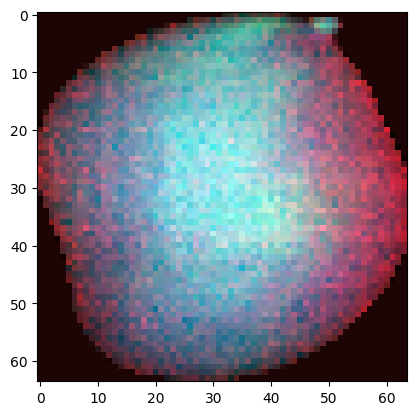

In [83]:
# spectral data being displayed
view1 = imshow(img1)
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/mango_image.png")

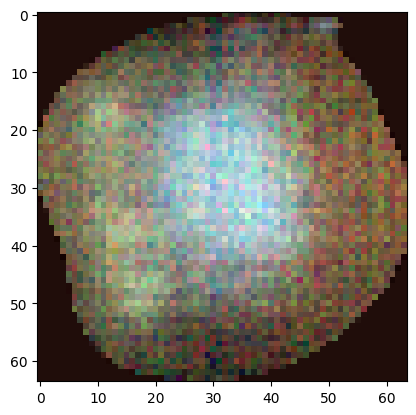

In [84]:
# spectral data with specified bands to use for the red, green, and blue channels in the display
view_bands_channel = imshow(img1,(10,20, 30))
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/view_bands_channel_10_20_30.png")

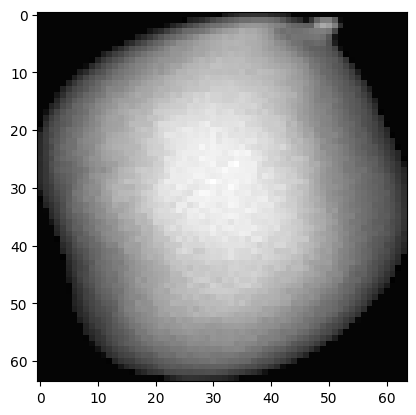

In [85]:
# Image can be plotted also by reading a single band.
img_band200 = envi.open(img_hdr, img_bin).read_band(200)
view_band = imshow(img_band200)
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/img_band200.png")


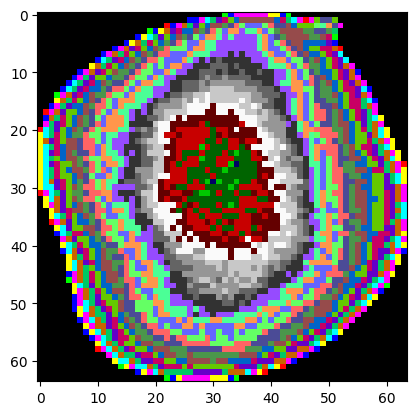

In [86]:
# To display the ground truth image
display_ground_truth = imshow(classes=img_band200)
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/display_ground_truth_band_200.png")

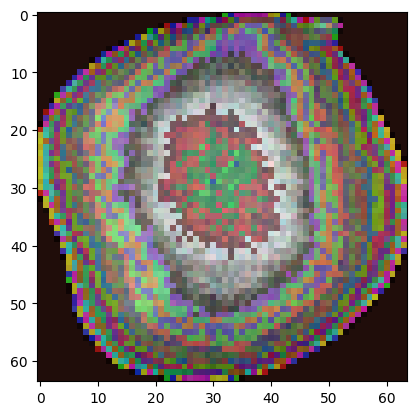

In [87]:
# The data can be displayed also with the original image by overlaying both images.
display = imshow(img1,(10,20,30),classes=img_band200)
display.set_display_mode('overlay')
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/display_ground_truth_band_200_overlay.png")


spectral:INFO: k-means iteration 1 - 3235 pixels reassigned.
spectral:INFO: k-means iteration 2 - 225 pixels reassigned.
spectral:INFO: k-means iteration 3 - 151 pixels reassigned.
spectral:INFO: k-means iteration 4 - 96 pixels reassigned.
spectral:INFO: k-means iteration 5 - 63 pixels reassigned.
spectral:INFO: k-means iteration 6 - 41 pixels reassigned.
spectral:INFO: k-means iteration 7 - 23 pixels reassigned.
spectral:INFO: k-means iteration 8 - 23 pixels reassigned.
spectral:INFO: k-means iteration 9 - 23 pixels reassigned.
spectral:INFO: k-means iteration 10 - 17 pixels reassigned.
spectral:INFO: k-means iteration 11 - 16 pixels reassigned.
spectral:INFO: k-means iteration 12 - 16 pixels reassigned.
spectral:INFO: k-means iteration 13 - 11 pixels reassigned.
spectral:INFO: k-means iteration 14 - 17 pixels reassigned.
spectral:INFO: k-means iteration 15 - 9 pixels reassigned.


spectral:INFO: k-means iteration 16 - 4 pixels reassigned.
spectral:INFO: k-means iteration 17 - 5 pixels reassigned.
spectral:INFO: k-means iteration 18 - 1 pixels reassigned.
spectral:INFO: k-means iteration 19 - 0 pixels reassigned.
spectral:INFO: kmeans terminated with 5 clusters after 18 iterations.


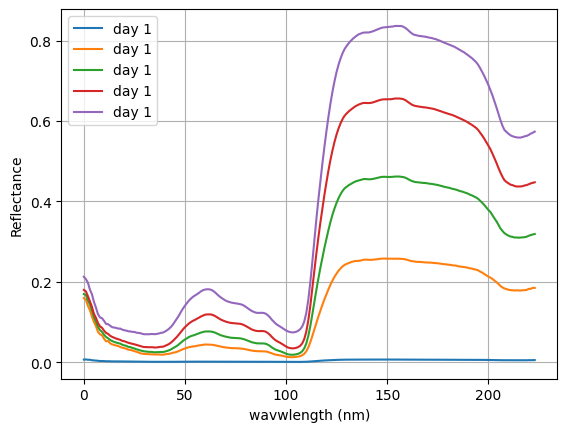

In [88]:
# ploting image data.
# An image can be plotted using Matplot lib using Kmeans clustering.
day1_hdrFile_f1 = "/home/sayan/ce301/read_file/day1/mango_day_1_m3_01_front.hdr"
day1_BinFile_f1 = "/home/sayan/ce301/read_file/day1/mango_day_1_m3_01_front.bin"
imgDay1_front1 = envi.open (day1_hdrFile_f1, day1_BinFile_f1).load()

clusters = 5
(a, a1) = kmeans(imgDay1_front1,clusters,60)
plt.figure()
plt.xlabel("wavwlength (nm)")
plt.ylabel("Reflectance")
for i in range(0,a1.shape[0]):
     plt.plot(a1[i], label= f'day 1')
        
plt.legend()
plt.grid()
plt.savefig("/home/sayan/ce301/coding/Experiment_Images/mango_spectral_day1_front_graph.png")